In [1]:
# Name:Ashish Sahu
# CodSoft Machine learning
#Movie genre prediction

#Import libraries

In [1]:
!pip install nltk
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#Load training data

In [7]:
train_path = "/content/sample_data/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [8]:
print(train_data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [9]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [10]:
print(train_data.isnull().sum())

Title          0
Genre          0
Description    0
dtype: int64


#Load testing data

In [11]:
test_path = "/content/sample_data/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')


In [12]:
#show first 15 records
test_data.head(15)

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
9,10,Press (2011),Press is a story of young people overwhelmed ...


#EDA & Visualization

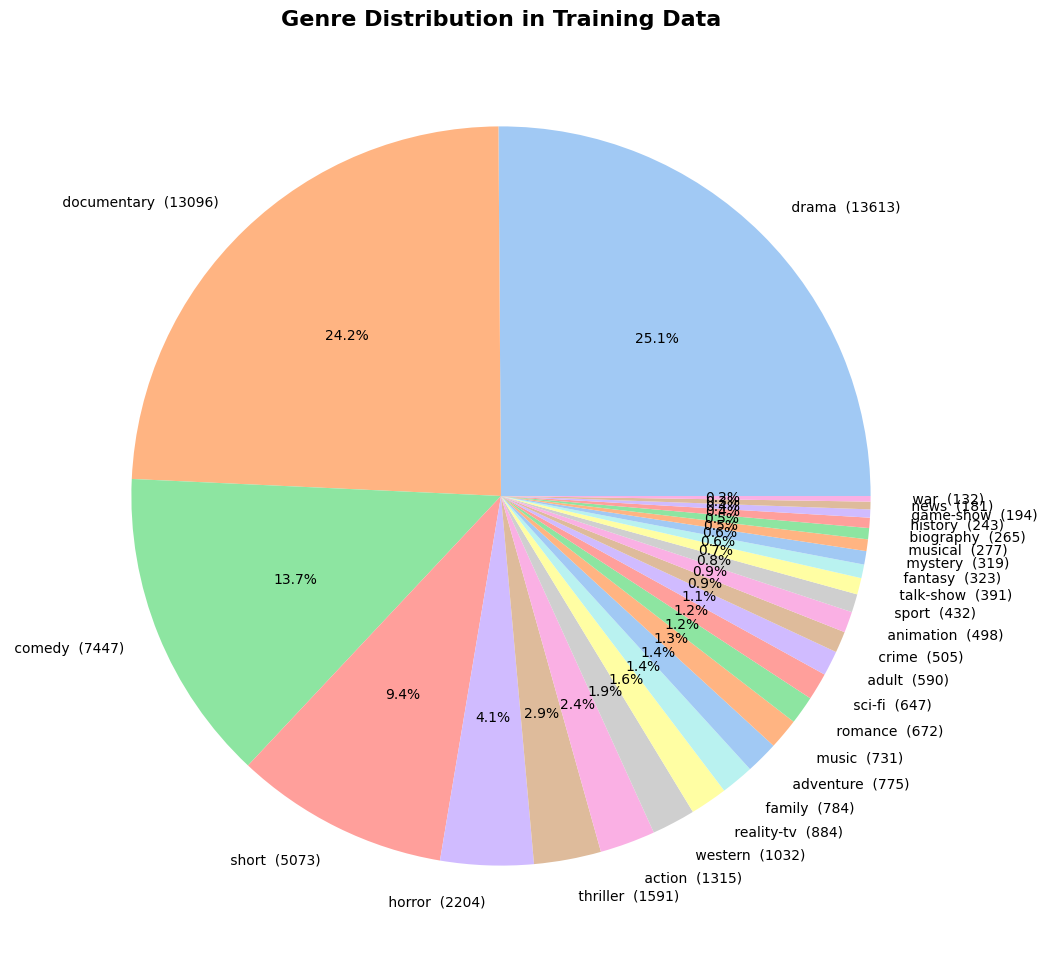

In [13]:
# Plot the distribution of genres in the training data using a pie chart with genre counts
plt.figure(figsize=(18, 12))
genre_counts = train_data['Genre'].value_counts()
plt.pie(genre_counts, labels=[f"{genre} ({count})" for genre, count in zip(genre_counts.index, genre_counts)],
        autopct='%1.1f%%', colors=sns.color_palette('pastel', len(genre_counts)))
plt.title('Genre Distribution in Training Data', fontsize=16, fontweight='bold')

plt.show()


#Data preprocessing and Text Cleaning

In [14]:
import nltk

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    # Lowercase all characters
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)  # Import nltk module and use its word_tokenize function
    # Remove stopwords and lemmatize the words
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)

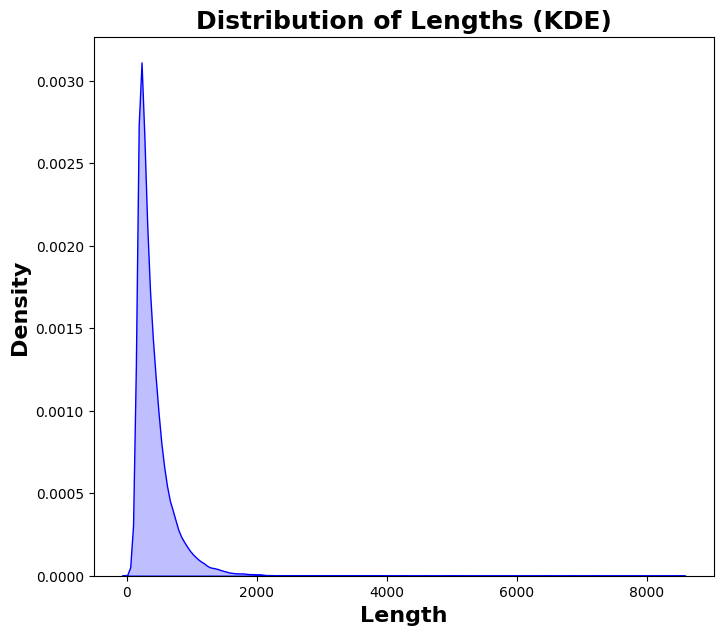

In [15]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

# Visualize the distribution of text lengths using KDE plot
plt.figure(figsize=(8, 7))
sns.kdeplot(data=train_data, x='length_Text_cleaning', color='blue', fill=True)
plt.xlabel('Length', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.title('Distribution of Lengths (KDE)', fontsize=18, fontweight='bold')
plt.show()

#Text Vectorization Using TF-IDF

In [16]:
# Import the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF transformation to the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_data['Text_cleaning'])

# Split Data and Train a Model (Logistic regression)

In [17]:
# Split the data into training and validation sets
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
classifier = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))




Validation Accuracy: 0.5805588859171816


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.54      0.23      0.32       263
       adult        0.81      0.19      0.30       112
   adventure        0.49      0.12      0.20       139
   animation        0.67      0.02      0.04       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        0.25      0.01      0.02       107
 documentary        0.66      0.86      0.75      2659
       drama        0.53      0.80      0.64      2697
      family        0.47      0.06      0.11       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.88      0.35      0.50        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.56      0.61       431
       music        0.69      0.41      0.51       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test_tfidf)
test_data['Predicted_Genre'] = X_test_predictions

In [19]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

In [20]:
test_data.to_csv('predicted_genres.csv', index=False)

In [21]:
from google.colab import files

files.download('predicted_genres.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>